# SVM Classifier using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm SVM as a Classifier algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis.

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset,position):
    dataset.iloc[:,position:] = dataset.iloc[:,position:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset,4)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Dataset Overall Info

In [5]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [6]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [7]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    total_amount = dataset.count() + dataset.isnull().sum()
    total_pd = pd.DataFrame(total_amount,columns=['Samples'])
    missing_percentage = (dataset.isnull().sum() / (dataset.count() + dataset.isnull().sum()))
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(total_pd).join(missing_percentage_dataset)
    display(missing_dataset)
    return missing_dataset

In [8]:
missing_dataset = compute_missing_values(dataset)

,Missing Values,Samples,% of Missing Values
Fingerprint ID,0,750,0.000000
coordinate_X,0,750,0.000000
coordinate_Y,0,750,0.000000
zone,0,750,0.000000
f0:5c:19:94:1a:40,120,750,0.160000
f0:5c:19:94:1a:41,116,750,0.154667
f0:5c:19:94:1a:42,115,750,0.153333
34:fc:b9:18:e4:c1,561,750,0.748000
34:fc:b9:18:e4:c0,605,750,0.806667
34:fc:b9:18:e4:c2,572,750,0.762667


### Overall Histogram of dataset atributes

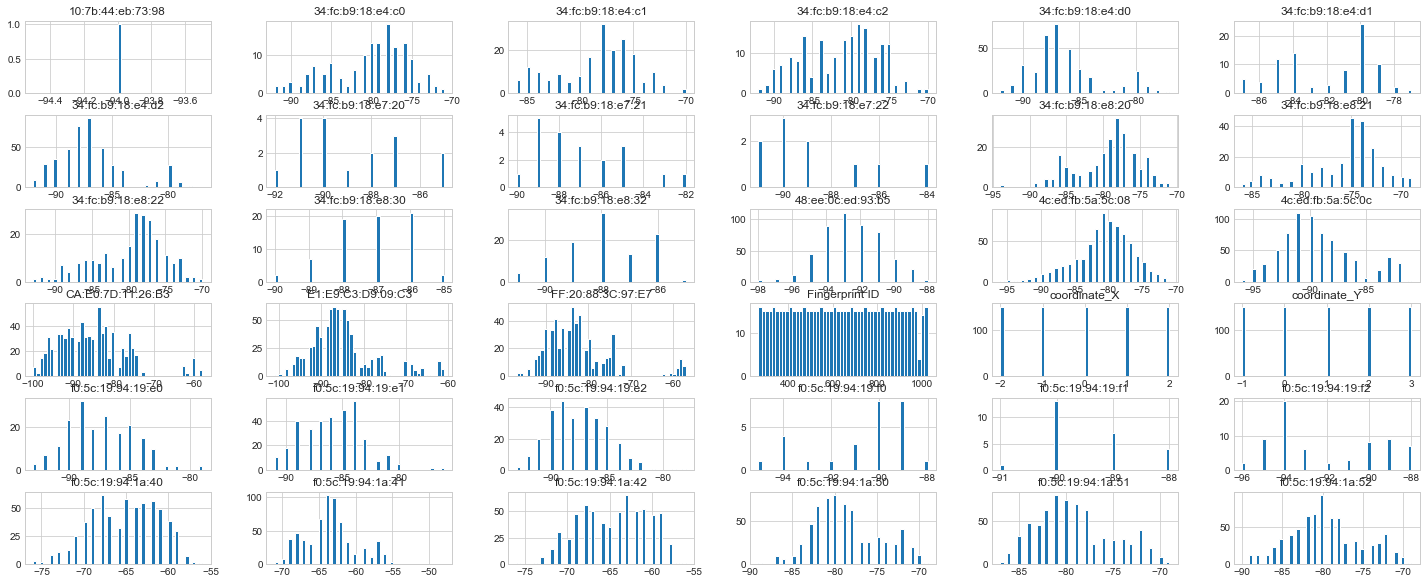

In [9]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Zone
Graphical display of the zones scanned in the experiment

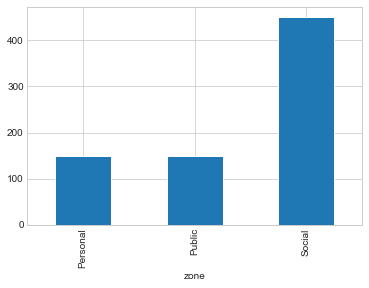

In [10]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,-80.0,-80.0,-80.0,-89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,-80.0,-81.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-63.0,-62.0,-62.0,NaN,NaN,NaN,-80.0,-79.0,-80.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-63.0,-61.0,-63.0,NaN,NaN,NaN,-81.0,-81.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,-80.0,-80.0,-81.0,-90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0
746,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-74.0,-73.0,-83.0,...,-86.0,NaN,NaN,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0
747,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,-73.0,-73.0,-83.0,...,NaN,NaN,NaN,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0
748,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,-72.0,-73.0,-83.0,...,-85.0,NaN,NaN,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN


<BarContainer object of 30 artists>

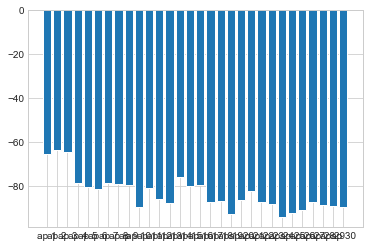

In [11]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.isupper() == True:
        first_beacon_index = list(dataset).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
display(dataset.iloc[:,4:first_beacon_index])
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


<BarContainer object of 3 artists>

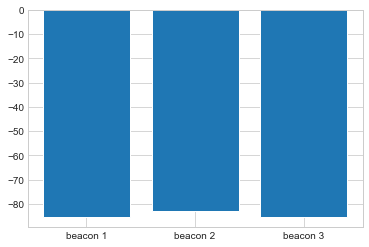

In [12]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,first_beacon_index:]
display(beacons)
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

### Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

#### Wifi Signal Strength

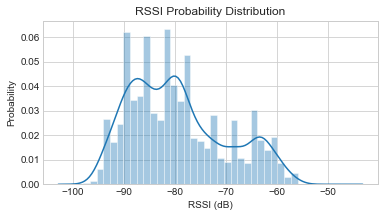

In [13]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
sns.distplot(dataset.iloc[:,4:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

#### Bluetooth Signal Strength

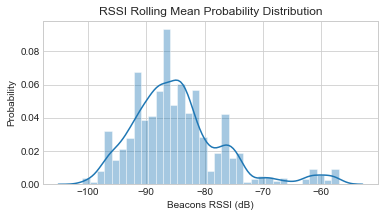

In [14]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [15]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [16]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers (Current approach is using the minimum global scanned value)

In [17]:
def compute_data_cleaning_with_local_minimum(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [18]:
def compute_data_cleaning_with_global_minimum(dataset):
    numpy_arr_wifi=dataset.iloc[:,4:first_beacon_index].to_numpy()
    numpy_arr_ble=dataset.iloc[:,first_beacon_index:].to_numpy()
    nan_filler_wifi = np.nanmin(numpy_arr_wifi)*1.010
    nan_filler_ble = np.nanmin(numpy_arr_ble)*1.010
    dataset.iloc[:,first_beacon_index:] = dataset.iloc[:,first_beacon_index:].fillna(nan_filler_ble)
    dataset.iloc[:,4:first_beacon_index] = dataset.iloc[:,4:first_beacon_index].fillna(nan_filler_wifi)
    print("MINIMUM WIFI: "+ str(nan_filler_wifi))
    print("MINIMUM BLE: "+ str(nan_filler_ble))

In [19]:
compute_data_cleaning_with_global_minimum(dataset)
display(dataset)

MINIMUM WIFI: -98.98
MINIMUM BLE: -102.01


,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


### Initialize Training Data
Training Data intialization for predictions purposes

In [20]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-86.00,-98.98,-98.98,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-98.98,-98.98,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-85.00,-98.98,-98.98,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98


(750, 30)

In [21]:
train_ble = dataset.iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


(750, 3)

In [22]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-86.0,-88.0,-96
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-88.0,-96
2,-63.00,-62.00,-62.00,-98.98,-98.98,-98.98,-80.0,-79.0,-80.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-94.0,-92.0,-98
3,-63.00,-61.00,-63.00,-98.98,-98.98,-98.98,-81.0,-81.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-92.0,-89.0,-96
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-71.0,-73.0,-73.0,-83.0,...,-98.98,-90.00,-89.00,-98.98,-98.98,-98.98,-90.00,-95.0,-84.0,-95
746,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-74.0,-73.0,-83.0,...,-98.98,-88.00,-98.98,-98.98,-98.98,-98.98,-90.00,-94.0,-83.0,-92
747,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-72.0,-73.0,-73.0,-83.0,...,-98.98,-89.00,-90.00,-98.98,-98.98,-98.98,-90.00,-92.0,-84.0,-91
748,-98.98,-98.98,-98.98,-98.98,-98.98,-98.98,-74.0,-72.0,-73.0,-83.0,...,-98.98,-91.00,-89.00,-98.98,-98.98,-98.98,-98.98,-93.0,-84.0,-93


(750, 33)

### Plot Training Data
Graphical Display of the observations in the dataset

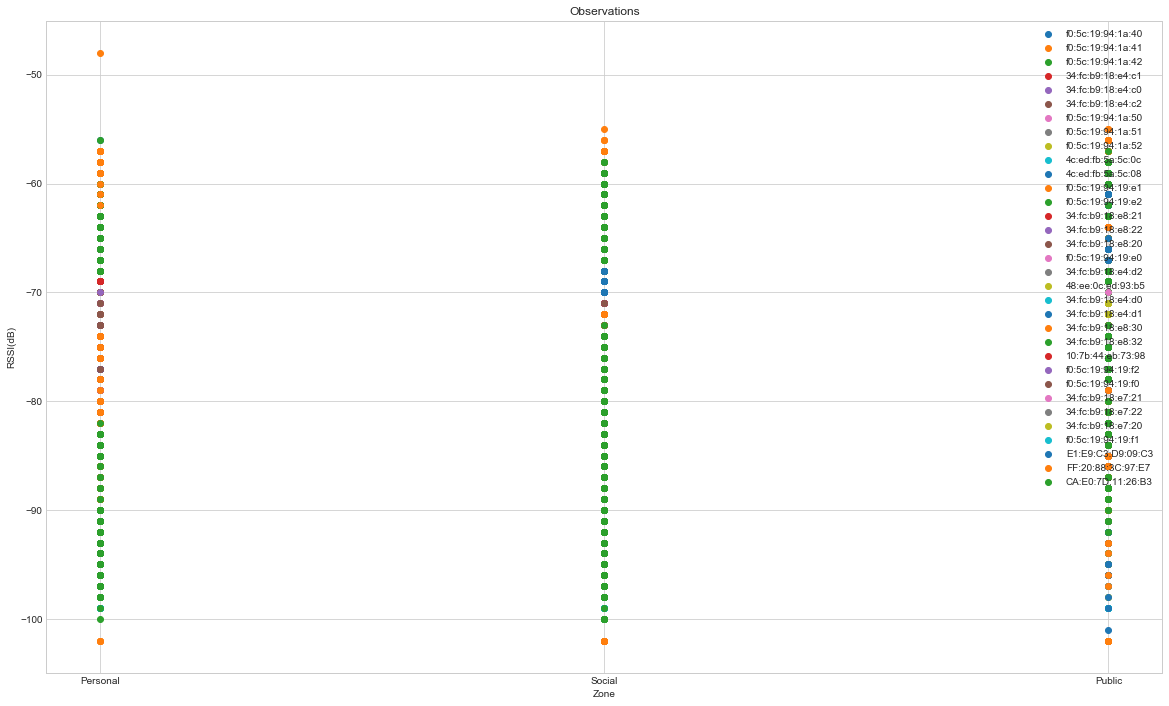

In [23]:
plt.figure(figsize=(20,12))
num = 0
palette = plt.get_cmap('Set1')
for x in X_train:
    num += 1
    plt.scatter(dataset['zone'],dataset[x],label=x,cmap='Sequential')
plt.title('Observations')
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [24]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [25]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed
train_Y = dataset['labels'].values.reshape(-1,1)

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [26]:
#SVM Configurable Arrays
C_parameter_list = [0.25,0.5,1.0,10.0,100.0,1000.0] 
kernel_list = ["linear","poly","rbf","sigmoid"]
filters_list = ["Median","Mean","No Filter"]
gamma_list = [10,100,"scale","auto"]
scaler_list = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
class_weights_list = ["balanced",None]
decision_function_shape_list = ["ovo","ovr"]
svc_basic = SVC()
print("DEFAULT HYPERPARAMETERS")
default_params = svc_basic.get_params()
display(pd.DataFrame(default_params,index=[1]))

DEFAULT HYPERPARAMETERS


,C,break_ties,cache_size,class_weight,coef0,decision_function_shape,degree,gamma,kernel,max_iter,probability,random_state,shrinking,tol,verbose
1,1.0,False,200,None,0.0,ovr,3,scale,rbf,-1,False,None,True,0.001,False


### Statistics Output Format
Structure of the statistical output of each call to the SVM Classification Function

In [27]:
def structure_data(data,precision,accuracy,f1score):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([0.04246893, 0.0471465 , 0.03455393, 0.00622893, 0.00348657,
       0.00537272, 0.0455566 , 0.04116551, 0.03835846, 0.09426787,
       0.02966071, 0.07568919, 0.03277586, 0.00988502, 0.00667919,
       0.0054788 , 0.01213935, 0.02079222, 0.02547743, 0.02841103,
       0.00626108, 0.02061602, 0.02769096, 0.        , 0.03210299,
       0.00584433, 0.00108158, 0.0008983 , 0.00098278, 0.01632469,
       0.0762573 , 0.05837486, 0.14797027])

CA:E0:7D:11:26:B3    0.147970
4c:ed:fb:5a:5c:0c    0.094268
E1:E9:C3:D9:09:C3    0.076257
f0:5c:19:94:19:e1    0.075689
FF:20:88:3C:97:E7    0.058375
f0:5c:19:94:1a:41    0.047146
f0:5c:19:94:1a:50    0.045557
f0:5c:19:94:1a:40    0.042469
f0:5c:19:94:1a:51    0.041166
f0:5c:19:94:1a:52    0.038358
f0:5c:19:94:1a:42    0.034554
f0:5c:19:94:19:e2    0.032776
f0:5c:19:94:19:f2    0.032103
4c:ed:fb:5a:5c:08    0.029661
34:fc:b9:18:e4:d0    0.028411
34:fc:b9:18:e8:32    0.027691
48:ee:0c:ed:93:b5    0.025477
34:fc:b9:18:e4:d2    0.020792
34:fc:b9:18:e8:30    0.020616
f0:5c:19:94:19:f1    0.016325
f0:5c:19:94:19:e0    0.012139
34:fc:b9:18:e8:21    0.009885
34:fc:b9:18:e8:22    0.006679
34:fc:b9:18:e4:d1    0.006261
34:fc:b9:18:e4:c1    0.006229
f0:5c:19:94:19:f0    0.005844
34:fc:b9:18:e8:20    0.005479
34:fc:b9:18:e4:c2    0.005373
34:fc:b9:18:e4:c0    0.003487
34:fc:b9:18:e7:21    0.001082
34:fc:b9:18:e7:20    0.000983
34:fc:b9:18:e7:22    0.000898
10:7b:44:eb:73:98    0.000000
dtype: flo

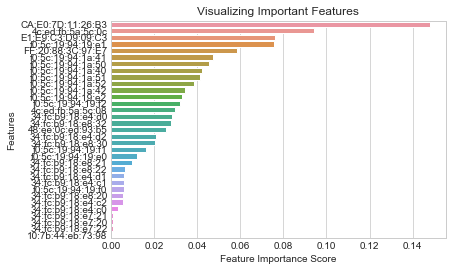

In [28]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - SVM Classification Model

In [29]:
def compute_SVM_with_Classifier(flag = 0,trainX_data = None,trainY_data = None,testX_data = None,testY_data = None,scaler = StandardScaler(),
                                cross_validation = None,C_parameter = 1.0, kernel_parameter='rbf', gamma_parameter="scale", 
                                class_weigth_parameter=None, decision_function_shape_parameter='ovr'):
    # Init the SVM Classificatioon Estimator with the hyperparameters
    svm_classifier_estimator = SVC(C=C_parameter,kernel=kernel_parameter,gamma=gamma_parameter,class_weight=class_weigth_parameter,
                                  decision_function_shape=decision_function_shape_parameter,random_state = 42)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,svm_classifier_estimator)
    else:
        # Use SKLearn SVM Classification default estimator
        main_estimator = svm_classifier_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        #Compute Classification performance metrics
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        # Fit and Predict the results of the testing data features using cross-validation
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        #Compute Classification performance metrics
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    if flag == 2:
        error_dataframe = pd.DataFrame({'Actual': testY_data, 'Predicted':predict_test})
    else:
        error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
    return structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())

### Experiments

#### Check Training model with no cross validation
Use SVM Classifier to check the results on the training data alone

Confusion Matrix:
[[115  17  18]
 [  1 140   9]
 [  4  11 435]]


,precision,recall,f1-score,support
0,0.958333,0.766667,0.851852,150.00
1,0.833333,0.933333,0.880503,150.00
2,0.941558,0.966667,0.953947,450.00
accuracy,0.920000,0.920000,0.920000,0.92
macro avg,0.911075,0.888889,0.895434,750.00
weighted avg,0.923268,0.920000,0.918839,750.00


,Actual,Predicted
0,0,0
1,0,0
2,0,2
3,0,0
4,0,0
...,...,...
745,0,0
746,0,0
747,0,0
748,0,0


Confusion Matrix:
[[ 29   0 121]
 [  0 102  48]
 [  0  22 428]]


,precision,recall,f1-score,support
0,1.000000,0.193333,0.324022,150.000000
1,0.822581,0.680000,0.744526,150.000000
2,0.716918,0.951111,0.817574,450.000000
accuracy,0.745333,0.745333,0.745333,0.745333
macro avg,0.846500,0.608148,0.628707,750.000000
weighted avg,0.794667,0.745333,0.704254,750.000000


,Actual,Predicted
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
745,0,2
746,0,2
747,0,2
748,0,2


Confusion Matrix:
[[140   0  10]
 [  0 148   2]
 [  5   4 441]]


,precision,recall,f1-score,support
0,0.965517,0.933333,0.949153,150.000
1,0.973684,0.986667,0.980132,150.000
2,0.973510,0.980000,0.976744,450.000
accuracy,0.972000,0.972000,0.972000,0.972
macro avg,0.970904,0.966667,0.968676,750.000
weighted avg,0.971946,0.972000,0.971904,750.000


,Actual,Predicted
0,0,0
1,0,0
2,0,2
3,0,0
4,0,0
...,...,...
745,0,0
746,0,0
747,0,0
748,0,0


,mae,mse,rmse,precision,accuracy,f1-score,type
2,0.028000,0.028000,0.167332,0.971260,0.972000,0.969768,Both
0,0.080000,0.080000,0.282843,0.914595,0.920000,0.903429,WiFi
1,0.254667,0.254667,0.504645,0.821000,0.745333,0.660736,BLE


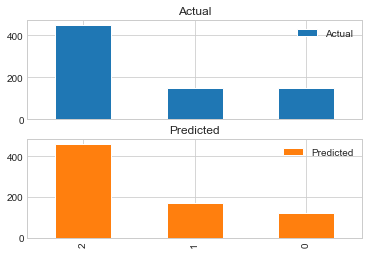

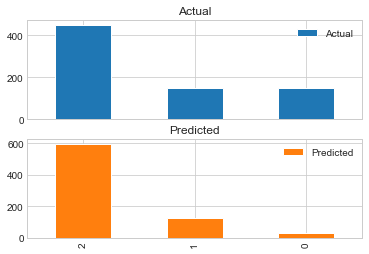

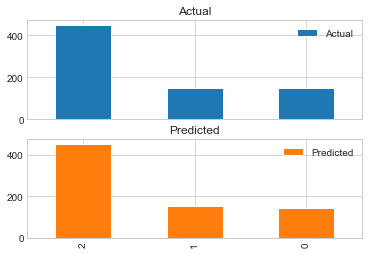

In [30]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_SVM_with_Classifier(flag=1,trainX_data=trainX_data,trainY_data=train_Y.ravel(),
                                   testX_data=trainX_data,testY_data=train_Y.ravel(),
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

#### Experiment - SVM with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

,mae,mse,rmse,precision,accuracy,f1-score,folds,type
25,0.152000,0.152000,0.389872,0.831602,0.848000,0.836140,9,Both
23,0.149333,0.149333,0.386437,0.843129,0.850667,0.835241,7,Both
26,0.149333,0.149333,0.386437,0.838765,0.850667,0.834577,10,Both
24,0.168000,0.168000,0.409878,0.818423,0.832000,0.814104,8,Both
22,0.196000,0.196000,0.442719,0.789210,0.804000,0.782491,6,Both
7,0.216000,0.216000,0.464758,0.778296,0.784000,0.757656,9,WiFi
8,0.221333,0.221333,0.470461,0.773318,0.778667,0.749905,10,WiFi
6,0.224000,0.224000,0.473286,0.767157,0.776000,0.744346,8,WiFi
5,0.224000,0.224000,0.473286,0.770713,0.776000,0.737724,7,WiFi
4,0.234667,0.234667,0.484424,0.762281,0.765333,0.729414,6,WiFi


Number of Folds:  9


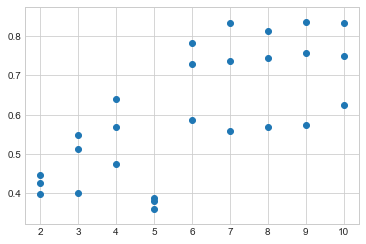

In [34]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = cv)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

#### Experiment - SVM with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

,mae,mse,rmse,precision,accuracy,f1-score,test_size,type
22,0.082667,0.082667,0.287518,0.934995,0.917333,0.907541,0.5,Both
19,0.086667,0.086667,0.294392,0.929702,0.913333,0.903486,0.2,Both
21,0.086667,0.086667,0.294392,0.929640,0.913333,0.903115,0.4,Both
18,0.093333,0.093333,0.305505,0.912968,0.906667,0.897246,0.1,Both
23,0.097778,0.097778,0.312694,0.919663,0.902222,0.890322,0.6,Both
24,0.110476,0.110476,0.332380,0.899034,0.889524,0.876905,0.7,Both
20,0.111111,0.111111,0.333333,0.908910,0.888889,0.874822,0.3,Both
25,0.115000,0.115000,0.339116,0.898415,0.885000,0.871164,0.8,Both
1,0.133333,0.133333,0.365148,0.884668,0.866667,0.845870,0.2,WiFi
0,0.146667,0.146667,0.382971,0.863387,0.853333,0.836159,0.1,WiFi


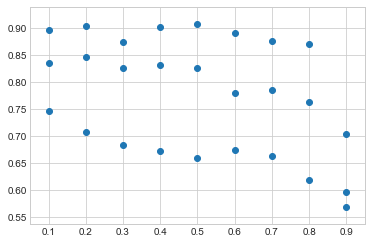

In [31]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = size, random_state = 42,stratify=train_Y)
        result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['test_size'],statistics['f1-score'])

#### Experiment - SVM with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [32]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

,mae,mse,rmse,precision,accuracy,f1-score,type
0,1.0,1.0,1.0,0.0,0.0,0.0,WiFi
1,1.0,1.0,1.0,0.0,0.0,0.0,BLE
2,1.0,1.0,1.0,0.0,0.0,0.0,Both


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using SVM

,mae,mse,rmse,precision,accuracy,f1-score,method,type
7,0.086667,0.086667,0.294392,0.929640,0.913333,0.903115,HoldOut,Both
8,0.152000,0.152000,0.389872,0.831602,0.848000,0.836140,Stratified K-Fold,Both
1,0.143333,0.143333,0.378594,0.862242,0.856667,0.832217,HoldOut,WiFi
2,0.216000,0.216000,0.464758,0.778296,0.784000,0.757656,Stratified K-Fold,WiFi
4,0.250000,0.250000,0.500000,0.827663,0.750000,0.671489,HoldOut,BLE
5,0.352000,0.352000,0.593296,0.628044,0.648000,0.574374,Stratified K-Fold,BLE
0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,WiFi
3,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,BLE
6,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO,Both


Selected cross validation method:  HoldOut


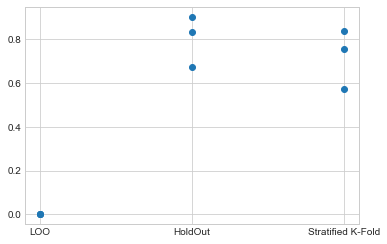

In [35]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
    holdout = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    loo = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skfold = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['method'],statistics['f1-score'],'o')
selected_method = "HoldOut"
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

,mae,mse,rmse,precision,accuracy,f1-score,preprocessing,preprocessingFunc,type
8,0.086667,0.086667,0.294392,0.929640,0.913333,0.903115,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
9,0.093333,0.093333,0.305505,0.919468,0.906667,0.895820,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
11,0.113333,0.113333,0.336650,0.915932,0.886667,0.868922,None,None,Both
10,0.116667,0.116667,0.341565,0.914046,0.883333,0.864382,MaxAbsScaler,MaxAbsScaler(copy=True),Both
0,0.143333,0.143333,0.378594,0.862242,0.856667,0.832217,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",WiFi
1,0.160000,0.160000,0.400000,0.852358,0.840000,0.813031,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",WiFi
2,0.233333,0.233333,0.483046,0.827470,0.766667,0.699311,MaxAbsScaler,MaxAbsScaler(copy=True),WiFi
3,0.233333,0.233333,0.483046,0.827470,0.766667,0.699311,None,None,WiFi
4,0.250000,0.250000,0.500000,0.827663,0.750000,0.671489,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",BLE
6,0.263333,0.263333,0.513160,0.817786,0.736667,0.653858,MaxAbsScaler,MaxAbsScaler(copy=True),BLE


Selected Preprocessing:  StandardScaler


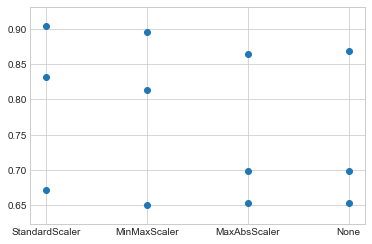

In [39]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for preprocess in scaler_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['preprocessing'],statistics['f1-score'])
selected_preprocessing = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

#### Experiment - Running the SVC function with the different kernels¶

,mae,mse,rmse,precision,accuracy,f1-score,kernel,type
10,0.086667,0.086667,0.294392,0.929640,0.913333,0.903115,rbf,Both
8,0.123333,0.123333,0.351188,0.867612,0.876667,0.865086,linear,Both
2,0.143333,0.143333,0.378594,0.862242,0.856667,0.832217,rbf,WiFi
0,0.150000,0.150000,0.387298,0.833688,0.850000,0.831372,linear,WiFi
9,0.146667,0.146667,0.382971,0.912262,0.853333,0.821524,poly,Both
1,0.196667,0.196667,0.443471,0.863091,0.803333,0.753266,poly,WiFi
6,0.250000,0.250000,0.500000,0.827663,0.750000,0.671489,rbf,BLE
5,0.260000,0.260000,0.509902,0.824024,0.740000,0.657032,poly,BLE
11,0.343333,0.343333,0.585947,0.621378,0.656667,0.613065,sigmoid,Both
4,0.320000,0.320000,0.565685,0.834589,0.680000,0.537432,linear,BLE


Selected Kernel:  rbf


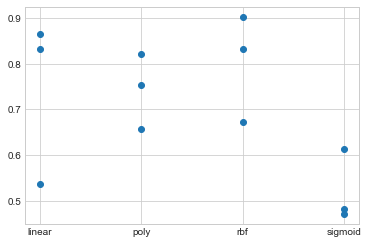

In [40]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','kernel','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for kernel in kernel_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),kernel_parameter=kernel,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),kernel_parameter=kernel,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),kernel_parameter=kernel)
        result.append(kernel)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['kernel'],statistics['f1-score'],'o')
selected_kernel = statistics.sort_values(by=['f1-score'],ascending=False)['kernel'].head(1).values[0]
print("Selected Kernel: ",selected_kernel)

#### Experiment - Running the SVC function with the different C parameters

,mae,mse,rmse,precision,accuracy,f1-score,C_parameter,type
17,0.073333,0.073333,0.270801,0.925329,0.926667,0.917808,1000.00,Both
16,0.073333,0.073333,0.270801,0.925329,0.926667,0.917808,100.00,Both
15,0.076667,0.076667,0.276887,0.925831,0.923333,0.913586,10.00,Both
14,0.086667,0.086667,0.294392,0.929640,0.913333,0.903115,1.00,Both
5,0.100000,0.100000,0.316228,0.902597,0.900000,0.885427,1000.00,WiFi
13,0.103333,0.103333,0.321455,0.918734,0.896667,0.883073,0.50,Both
4,0.106667,0.106667,0.326599,0.891789,0.893333,0.877085,100.00,WiFi
3,0.123333,0.123333,0.351188,0.880053,0.876667,0.860684,10.00,WiFi
2,0.143333,0.143333,0.378594,0.862242,0.856667,0.832217,1.00,WiFi
1,0.176667,0.176667,0.420317,0.841399,0.823333,0.792444,0.50,WiFi


Selected C Parameter:  1000.0


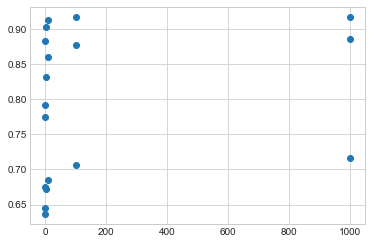

In [43]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','C_parameter','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for C_param in C_parameter_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),C_parameter=C_param,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),C_parameter=C_param,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),C_parameter=C_param)
        result.append(C_param)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['C_parameter'],statistics['f1-score'],'o')
selected_c_parameter = statistics.sort_values(by=['f1-score'],ascending=False)['C_parameter'].head(1).values[0]
print("Selected C Parameter: ",selected_c_parameter)

#### Experiment - Running the SVC function with the different gamma parameters

In [44]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','gamma','gammaStr','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for gamma_param in gamma_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),gamma_parameter=gamma_param,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),gamma_parameter=gamma_param,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),gamma_parameter=gamma_param)
        result.append(gamma_param)
        result.append(str(gamma_param))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
selected_gamma = statistics.sort_values(by=['f1-score'],ascending=False)['gamma'].head(1).values[0]
print("Selected Gamma: ",selected_gamma)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,mae,mse,rmse,precision,accuracy,f1-score,gamma,gammaStr,type
10,0.086667,0.086667,0.294392,0.929640,0.913333,0.903115,scale,scale,Both
11,0.086667,0.086667,0.294392,0.929640,0.913333,0.903115,auto,auto,Both
2,0.143333,0.143333,0.378594,0.862242,0.856667,0.832217,scale,scale,WiFi
3,0.143333,0.143333,0.378594,0.862242,0.856667,0.832217,auto,auto,WiFi
4,0.233333,0.233333,0.483046,0.772749,0.766667,0.731216,10,10,BLE
6,0.250000,0.250000,0.500000,0.827663,0.750000,0.671489,scale,scale,BLE
7,0.250000,0.250000,0.500000,0.827663,0.750000,0.671489,auto,auto,BLE
5,0.356667,0.356667,0.597216,0.690069,0.643333,0.480828,100,100,BLE
0,0.380000,0.380000,0.616441,0.811723,0.620000,0.396491,10,10,WiFi
1,0.400000,0.400000,0.632456,0.293333,0.600000,0.341667,100,100,WiFi


Selected Gamma:  scale


#### Experiment - Running the SVC function with the different weights metrics

,mae,mse,rmse,precision,accuracy,f1-score,class_weights,type
4,0.111111,0.111111,0.333333,0.881965,0.888889,0.878707,balanced,Both
5,0.111111,0.111111,0.333333,0.908910,0.888889,0.874822,None,Both
1,0.151111,0.151111,0.388730,0.859616,0.848889,0.825276,None,WiFi
0,0.186667,0.186667,0.432049,0.794595,0.813333,0.796800,balanced,WiFi
3,0.248889,0.248889,0.498888,0.813478,0.751111,0.682829,None,BLE
2,0.386667,0.386667,0.621825,0.650849,0.613333,0.620137,balanced,BLE


Selected Class Weight:  balanced


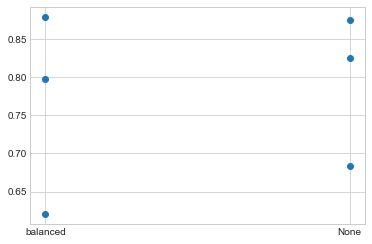

In [45]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','class_weights','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for weight in class_weights_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),class_weigth_parameter=weight,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),class_weigth_parameter=weight,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),class_weigth_parameter=weight)
        result.append(str(weight))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['class_weights'],statistics['f1-score'],'o')
selected_weight = statistics.sort_values(by=['f1-score'],ascending=False)['class_weights'].head(1).values[0]
print("Selected Class Weight: ",selected_weight)

#### Experiment: Running the SVC function with the different decision function metrics

,mae,mse,rmse,precision,accuracy,f1-score,decision_function,type
4,0.111111,0.111111,0.333333,0.908910,0.888889,0.874822,ovo,Both
5,0.111111,0.111111,0.333333,0.908910,0.888889,0.874822,ovr,Both
0,0.151111,0.151111,0.388730,0.859616,0.848889,0.825276,ovo,WiFi
1,0.151111,0.151111,0.388730,0.859616,0.848889,0.825276,ovr,WiFi
2,0.248889,0.248889,0.498888,0.813478,0.751111,0.682829,ovo,BLE
3,0.248889,0.248889,0.498888,0.813478,0.751111,0.682829,ovr,BLE


Selected Decision:  ovo


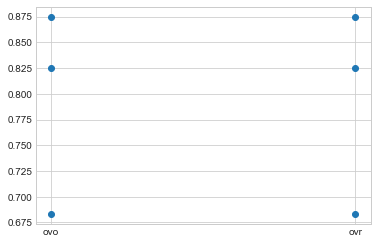

In [46]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','decision_function','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for decision in decision_function_shape_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),decision_function_shape_parameter=decision,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),decision_function_shape_parameter=decision,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),decision_function_shape_parameter=decision)
        result.append(str(decision))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['decision_function'],statistics['f1-score'],'o')
selected_decision = statistics.sort_values(by=['f1-score'],ascending=False)['decision_function'].head(1).values[0]
print("Selected Decision: ",selected_decision)

#### Run RandomizedSearchCV for parameter tunning

In [47]:
results = list()
tuned_parameters = {
    'svc__kernel':['rbf'],
    'svc__C':C_parameter_list,
    'svc__gamma':gamma_list
}
scores = ['f1_macro']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train 
        pipe = Pipeline([('standardizer', StandardScaler()), ('svc', SVC())])
        clf = RandomizedSearchCV(
           pipe, param_distributions = tuned_parameters, n_iter = 100, cv=selected_fold,scoring=score,verbose=1
        )
        clf.fit(trainX_data,train_Y.ravel())
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for f1_macro

Fitting 9 folds for each of 24 candidates, totalling 216 fits


D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    8.6s finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 9 folds for each of 24 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    6.7s finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 9 folds for each of 24 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    8.8s finished


,svc__kernel,svc__gamma,svc__C,score,best_score,type
2,rbf,scale,10.0,f1_macro,0.864347,Both
0,rbf,scale,1000.0,f1_macro,0.757448,WiFi
1,rbf,10,100.0,f1_macro,0.585267,BLE


### Best Parameters
Display the best parameters tunned throughout the experiments

In [48]:
conclusion_cols=['C Parameter','Cross Validation','Kernel','Preprocessing','Gamma','Class Weights','Decision Function']
conclusion_list = [selected_c_parameter,selected_method,selected_kernel,selected_preprocessing,selected_gamma,selected_weight,
                  selected_decision]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,C Parameter,Cross Validation,Kernel,Preprocessing,Gamma,Class Weights,Decision Function
0,1000.0,HoldOut,rbf,StandardScaler,scale,balanced,ovo


### Best Results

In [49]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
        result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                             cross_validation = splited,
                            kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             gamma_parameter=selected_gamma,decision_function_shape_parameter=selected_decision) 
    elif selected_method =='Stratified K-Fold':
        result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                             cross_validation = selected_fold,
                            kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             gamma_parameter=selected_gamma,decision_function_shape_parameter=selected_decision)  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
        result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             gamma_parameter=selected_gamma,decision_function_shape_parameter=selected_decision)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

,mae,mse,rmse,precision,accuracy,f1-score,type
2,0.075556,0.075556,0.274874,0.929196,0.924444,0.913224,Both
0,0.111111,0.111111,0.333333,0.892818,0.888889,0.873290,WiFi
1,0.271111,0.271111,0.520683,0.708283,0.728889,0.704205,BLE
